# Tarea 3

## Primera fase - Pre Procesado 

Durante esta fase se empieza con la carga de los datos, posteriormente descripción de las variables y si tenemos datos perdidos o NA. 

Posteriormente ante esa presencia se hace un estudio de las variables y se trata de lidiar con los datos perdidos, ya sea por metodos de estimación de los datos o si descarta del todo las observaciones

In [25]:
import pandas as pd
import numpy as np


In [26]:
df = pd.read_csv("weatherAUS.csv")

In [3]:
df.shape

(142193, 24)

In [4]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,0.0,No
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,...,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,0.0,No
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,0.0,No
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,1.4,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,...,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,0.0,No


In [5]:
df.isnull().values.any()

True

In [17]:
df.isnull().sum()

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RISK_MM              0
RainTomorrow         0
dtype: int64

A partir de lo anterior se puede observar que las variales Evaporation, Sunshine, Cloud9am and cloud3pm tienen casi la mitad de valores perdidos (NA) es necesario evaluar la forma de lidiar con esos datos perdidos. 

Empecemos con Evaporation

In [7]:
df[df["Evaporation"].isnull()==False]['Evaporation']

5939      12.0
5940      14.8
5941      12.6
5942      10.8
5943      11.4
          ... 
140667     6.4
140668     9.6
140669     3.6
140670     4.0
140671     6.4
Name: Evaporation, Length: 81350, dtype: float64

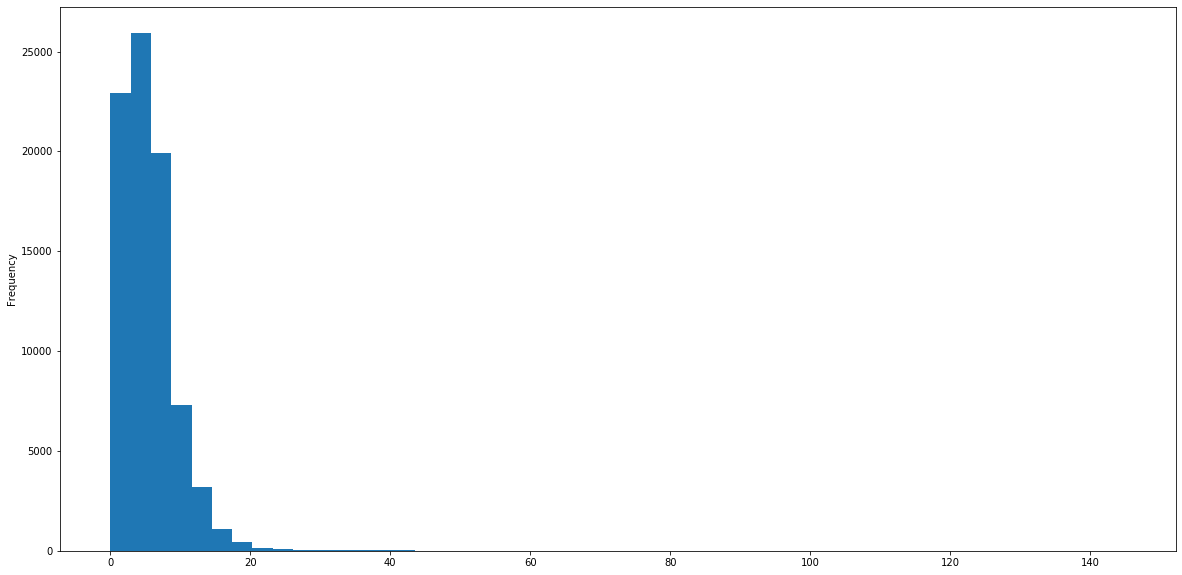

In [9]:
df[(df["Evaporation"].isnull()==False)]
df["Evaporation"].plot.hist(bins = 50,alpha =1,figsize=(20,10))

El grafico anterior me da indicios de que existen valores extremos y que la gran mayoria de valores para la columna de Evaporation
se encuentran entre 0 y 20, sin embargo para comprobar esto de forma visual se puede construir unn boxplot y ademas recurriendo a 
una descripcion de los datos

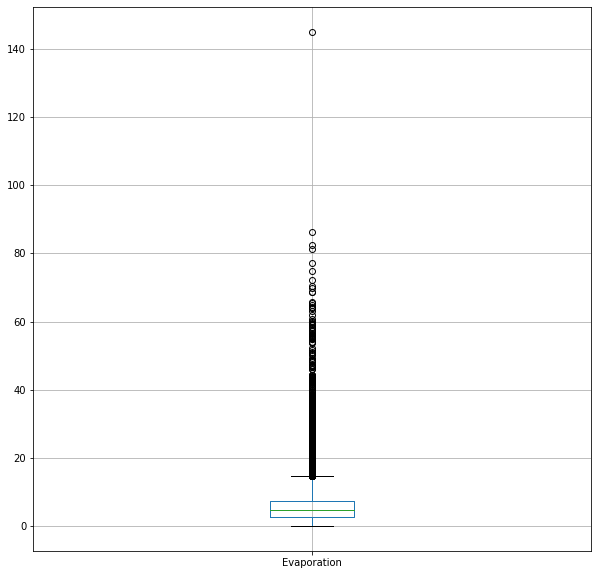

In [11]:
df.boxplot(column=['Evaporation'], figsize=(10,10) )

In [12]:
df["Evaporation"].describe(percentiles = [.25,.5,.75,.99])

count    81350.000000
mean         5.469824
std          4.188537
min          0.000000
25%          2.600000
50%          4.800000
75%          7.400000
99%         18.400000
max        145.000000
Name: Evaporation, dtype: float64

Podemos ver que que el extremo superior es menor que 20 y que la media de la muestra es menor a 10. por tanto podemos categorizar a los valores mayores a  18.4 como valores extremos. Por tanto, al ser tantos valores perdidos del total de la muestra, para lidiar con ellos se propone generar un valores aleatorios que sigan una distribucion parecido a los datos obtenidos, esto mediante generar valores random que tengan una distribucion estandar igual a la que muestran el 99% de los valores que si tenemos y a partir de la media de los datos 

In [13]:
df[(df["Evaporation"].isnull()==False) & (df["Evaporation"]<18.4)]['Evaporation'].describe(percentiles = [.25,.5,.75,.99])

count    80523.000000
mean         5.245637
std          3.365052
min          0.000000
25%          2.600000
50%          4.600000
75%          7.200000
99%         15.200000
max         18.200000
Name: Evaporation, dtype: float64

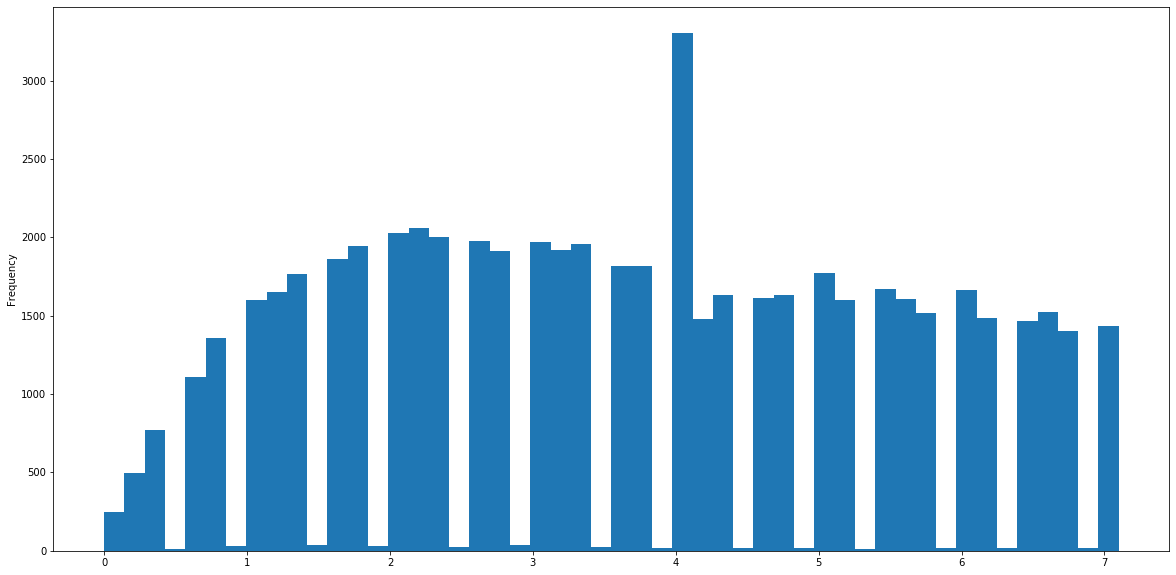

In [14]:
df[(df["Evaporation"].isnull()==False) & (df["Evaporation"]<7.2)]['Evaporation'].plot.hist(bins = 50,alpha =1,figsize=(20,10))

De aqui ya tenemos 

In [27]:
dict = df[(df["Evaporation"].isnull()==False) & (df["Evaporation"]<7.2)]['Evaporation'].describe(percentiles = [.25,.5,.75,.99]).to_dict()
print (dict)

{'count': 59384.0, 'mean': 3.635349589114913, 'std': 1.8637246075634437, 'min': 0.0, '25%': 2.0, '50%': 3.6, '75%': 5.2, '99%': 7.0, 'max': 7.1}


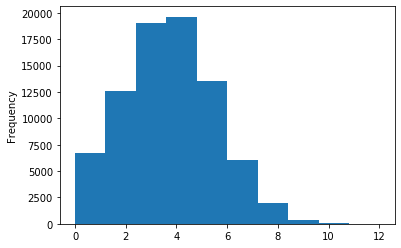

In [16]:
pd.Series(np.absolute(np.random.normal(dict['mean'], dict['std'], 80000).round(1))).plot.hist()

In [19]:
df['Evaporation'].fillna(value = pd.Series(np.absolute(np.random.normal(dict['mean'], dict['std'], len(df[df['Evaporation'].isnull()==True].index)).round(1))),inplace=True )



TypeError: fillna() got an unexpected keyword argument 'values'

In [120]:
fill_list=[22, 56, 84]
np.random.choice(fill_list, size=len(df.index))

array([84, 22, 84, ..., 22, 22, 56])

In [18]:
len(df[df['Evaporation'].isnull()==True].index)

60843

In [127]:
df['Evaporation'].isnull()

0         False
1         False
2         False
3         False
4         False
          ...  
142188     True
142189     True
142190     True
142191     True
142192     True
Name: Evaporation, Length: 142193, dtype: bool

In [129]:
df['Evaporation']

0         3.4
1         0.3
2         3.4
3         3.5
4         0.9
         ... 
142188    NaN
142189    NaN
142190    NaN
142191    NaN
142192    NaN
Name: Evaporation, Length: 142193, dtype: float64

In [28]:
pd.Series(np.absolute(np.random.normal(dict['mean'], dict['std'], len(df[df['Evaporation'].isnull()==True].index)).round(1)))

0        9.6
1        1.7
2        6.2
3        5.3
4        4.7
        ... 
60838    5.2
60839    3.4
60840    4.7
60841    4.4
60842    5.8
Length: 60843, dtype: float64